# Titanic - Machine Learning from Disaster
https://www.kaggle.com/c/titanic/overview

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read the data in dataframe

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data cleaning

### Useless columns

In [5]:
# Get rid of columns that are not useful
train_data.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
test_data.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

In [6]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Seperate the features and Labels

In [7]:
# store feature matrix in "X"
X = train_data.iloc[:, 1:]   

# store response vector in "y"
y = train_data.iloc[:,0]    

print(y.shape)
print(X.shape)

(891,)
(891, 7)


In [8]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [9]:
# See null data
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
# Check for all the na values 
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Check for outliers in Age column

In [11]:
## summary statistics of quantitative variables
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age'>

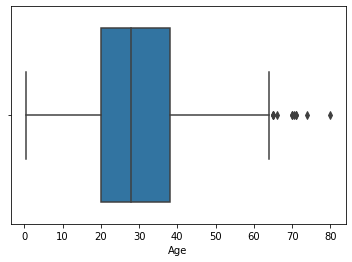

In [12]:
## looking at Age box plot
sns.boxplot(x = X['Age'])

### imputing the values in Age 

In [13]:
# Since there are a few outliers, we can use the median of the column to impute the missing values using the pandas median() method.
## imputing the values with median
median = X['Age'].median()
X['Age'] = X['Age'].fillna(median)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


### Look for the category distribution in categorical columns

In [14]:
X['Pclass'].value_counts() / len(X)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [15]:
X['Sex'].value_counts() / len(X)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [16]:
X['SibSp'].value_counts() / len(X)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [17]:
X['Parch'].value_counts() / len(X)

0    0.760943
1    0.132435
2    0.089787
3    0.005612
5    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [18]:
X['Embarked'].value_counts() / len(X)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

In [19]:
# filling with most common class
X = X.apply(lambda x: x.fillna(x.value_counts().index[0]))
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


## Plot for correlation

In [20]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


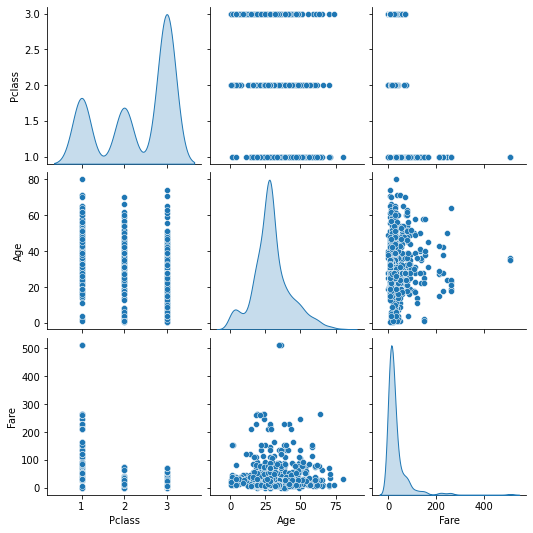

In [21]:
## pairplots to get an intuition of potential corelations
sns.pairplot(X[["Pclass", "Age", "Fare"]], diag_kind="kde")

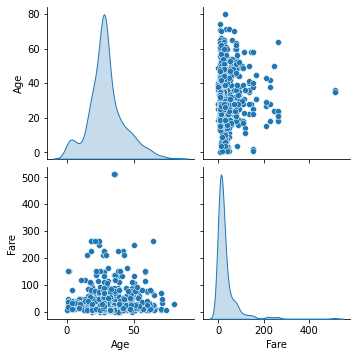

In [22]:
sns.pairplot(X[["Age", "Fare"]], diag_kind="kde")

# One hot Encoding

In [23]:
#converting integer classes to Letters and prepare for One Hot Encoding
X['Pclass'] = X['Pclass'].map({1: 'A', 2: 'B', 3 : 'C'})
X.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
125,C,male,12.0,1,0,11.2417,C
162,C,male,26.0,0,0,7.7750,S
111,C,female,14.5,1,0,14.4542,C
563,C,male,28.0,0,0,8.0500,S
486,A,female,35.0,1,0,90.0000,S
82,C,female,28.0,0,0,7.7875,Q
188,C,male,40.0,1,1,15.5000,Q
200,C,male,28.0,0,0,9.5000,S
699,C,male,42.0,0,0,7.6500,S
590,C,male,35.0,0,0,7.1250,S


In [24]:
## One hot Encoding
X = pd.get_dummies(X, prefix='', prefix_sep='')
X.head()

,Age,SibSp,Parch,Fare,A,B,C,female,male,C,Q,S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


# Checking correlation matrix w.r.t. MPG


In [25]:
# Current Correlation
corr_matrix = train_data.corr()
corr_matrix['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64